## COVID-19 Data Analysis (Jan 2020 to August 2020)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load your dataset
data = pd.read_csv('complete.csv')
data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   float64
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   float64
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 366.7+ KB


In [4]:
data.describe(),data.shape

(          Latitude    Longitude  Total Confirmed cases  \
 count  4692.000000  4692.000000            4692.000000   
 mean     23.185327    81.451837           11393.925192   
 std       6.635913     6.959475           37208.600846   
 min       0.000000     0.000000               1.000000   
 25%      18.112400    76.271100              39.000000   
 50%      23.940800    79.019300             619.000000   
 75%      28.218000    85.313100            5233.000000   
 max      34.299600    94.727800          468265.000000   
 
        Cured/Discharged/Migrated     New cases  New deaths  New recovered  
 count                4692.000000   4692.000000      4692.0    4692.000000  
 mean                 6908.130648    418.643009         0.0     283.069054  
 std                 23390.671258   1259.748923         0.0     947.925811  
 min                     0.000000      0.000000         0.0      -1.000000  
 25%                     9.000000      1.000000         0.0       0.000000  
 50% 

In [5]:
# Convert the 'Death' column to numeric, handling any errors
data['Death'] = pd.to_numeric(data['Death'], errors='coerce')

# Check for any remaining non-numeric entries after conversion
non_numeric_deaths = data[data['Death'].isnull()]

# Display the entries with non-numeric values in 'Death' column
non_numeric_deaths.head(), non_numeric_deaths.shape

(            Date Name of State / UT  Latitude  Longitude  \
 2241  2020-05-24         Puducherry   11.9416    79.8083   
 
       Total Confirmed cases  Death  Cured/Discharged/Migrated  New cases  \
 2241                   26.0    NaN                       10.0          0   
 
       New deaths  New recovered  
 2241           0              0  ,
 (1, 10))

In [6]:
# Replace the NaN value in the 'Death' column with 0
data['Death'].fillna(0, inplace=True)

# Verify that there are no more non-numeric values in the 'Death' column
data.info(), data['Death'].isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   float64
 5   Death                      4692 non-null   float64
 6   Cured/Discharged/Migrated  4692 non-null   float64
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 366.7+ KB


C:\Users\imran\AppData\Local\Temp\ipykernel_10700\1006837101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Death'].fillna(0, inplace=True)


(None, 0)

### COVID-19 Time Series Analysis

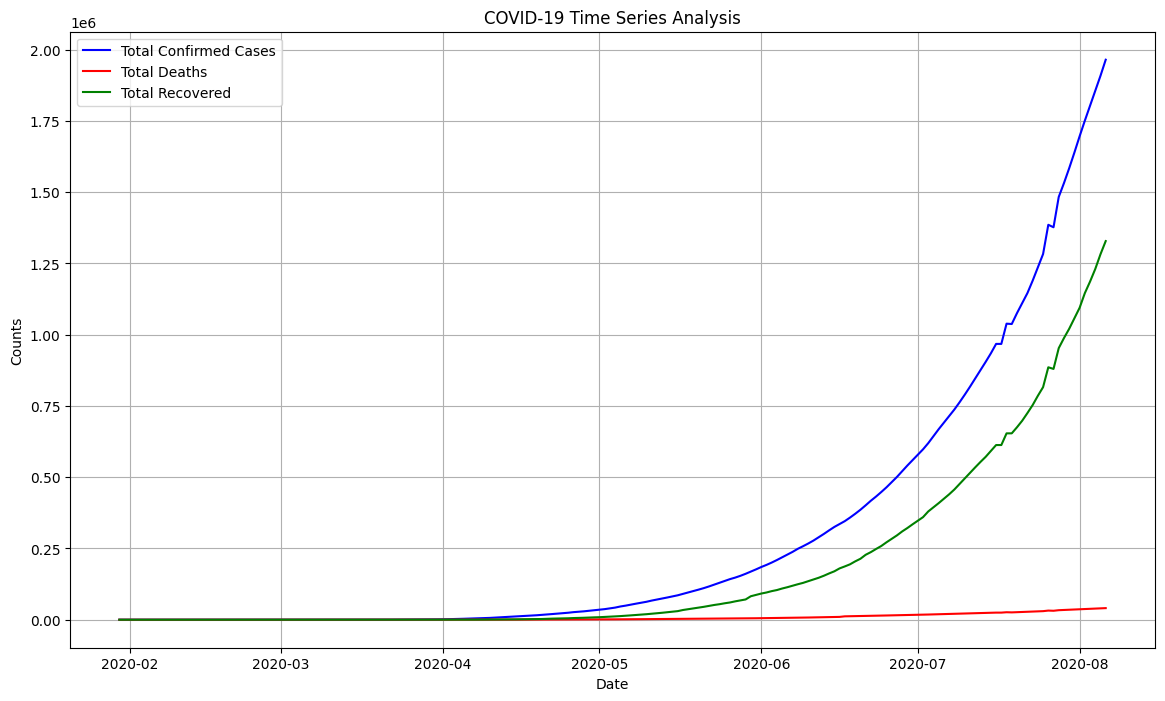

In [7]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by date for total confirmed cases, deaths, and recoveries
daily_data = data.groupby('Date').sum()
# print(daily_data)
# Plotting time series for total confirmed cases, deaths, and recoveries
plt.figure(figsize=(14, 8))

plt.plot(daily_data.index, daily_data['Total Confirmed cases'], label='Total Confirmed Cases', color='blue')
plt.plot(daily_data.index, daily_data['Death'], label='Total Deaths', color='red')
plt.plot(daily_data.index, daily_data['Cured/Discharged/Migrated'], label='Total Recovered', color='green')

plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()

## State-wise Distribution

C:\Users\imran\AppData\Local\Temp\ipykernel_10700\2407591263.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Death'].fillna(0, inplace=True)


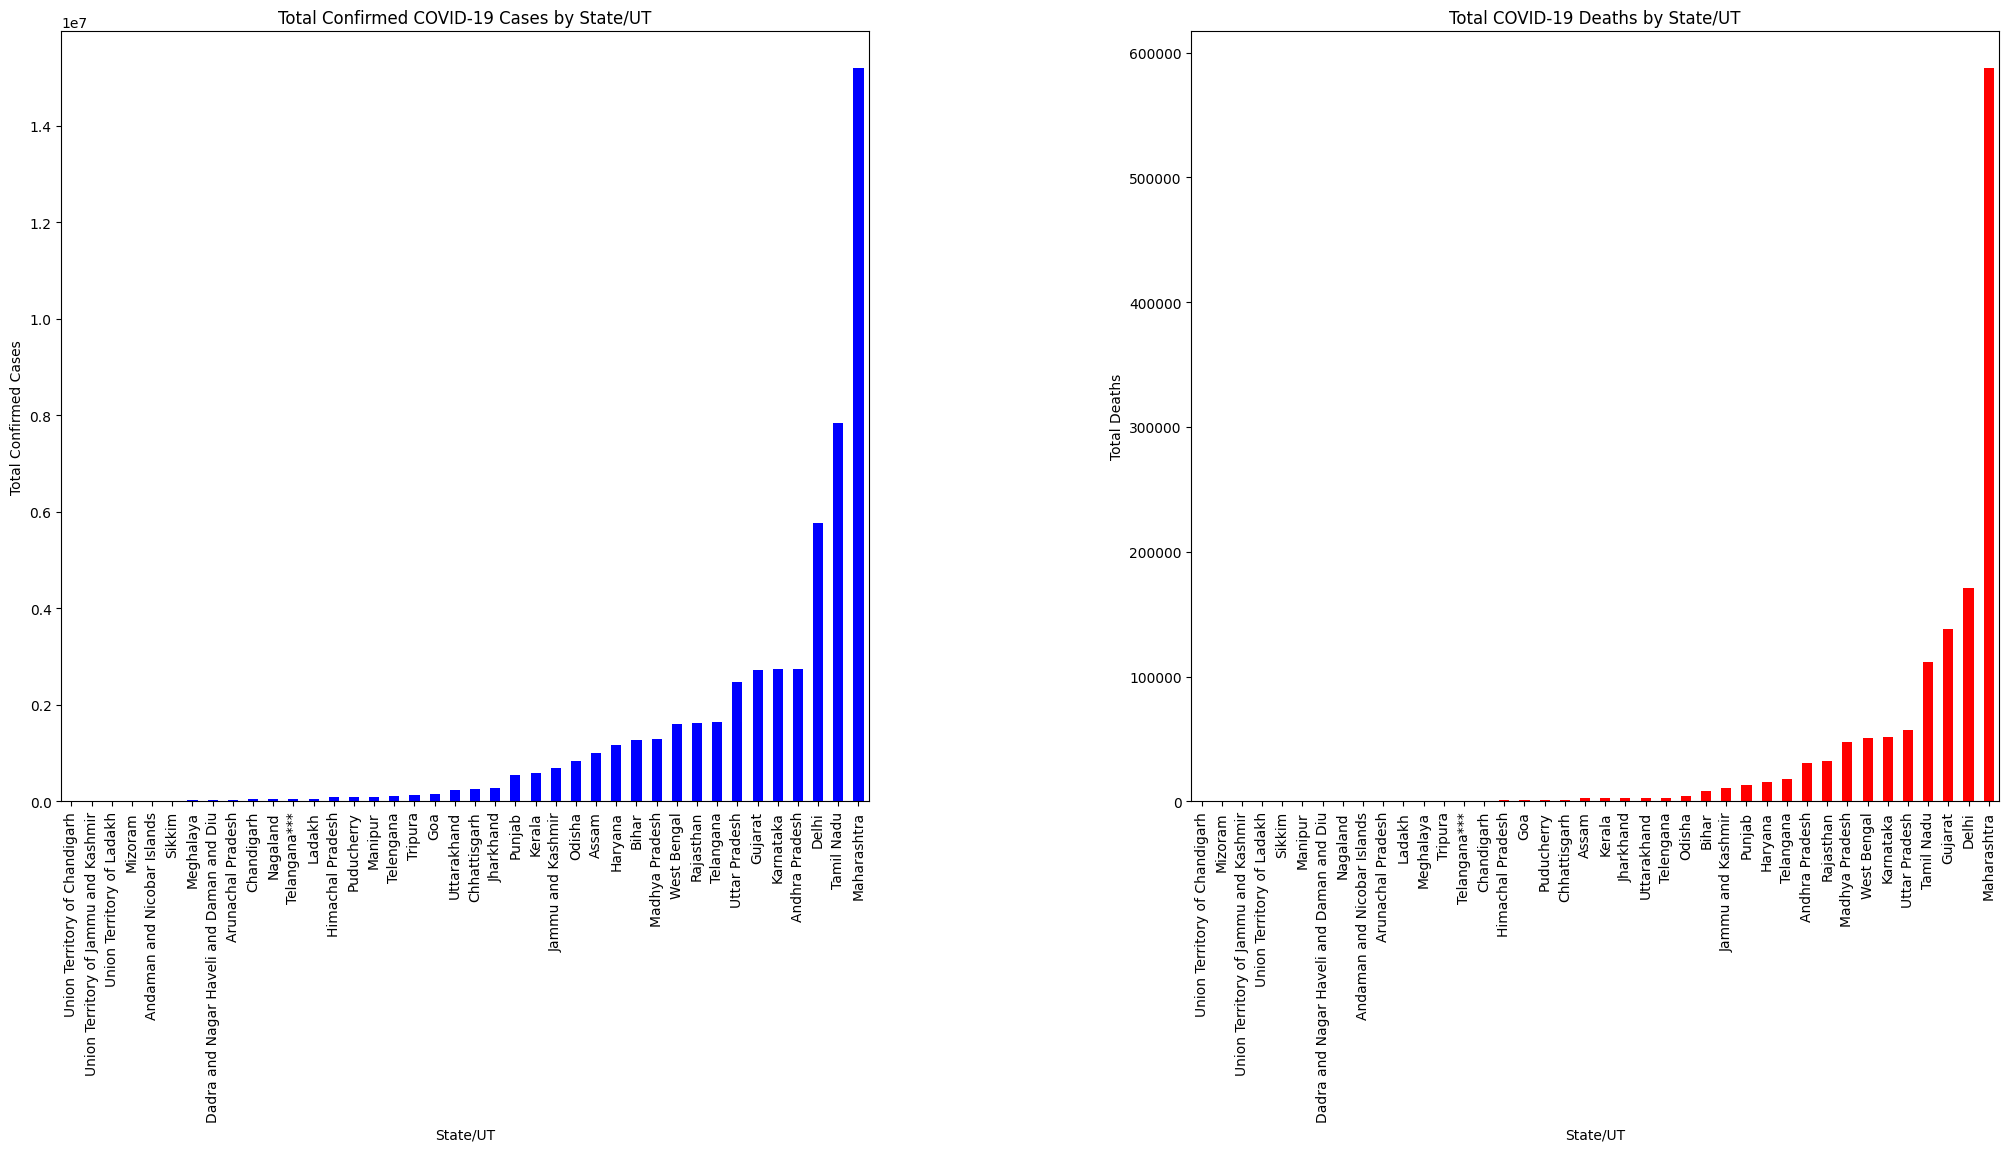

In [8]:

data = pd.read_csv('complete.csv')

# Convert 'Death' to numeric
data['Death'] = pd.to_numeric(data['Death'], errors='coerce')
data['Death'].fillna(0, inplace=True)

# Group by 'Name of State / UT' to find total confirmed cases and deaths
statewise_data = data.groupby('Name of State / UT').sum()

# Create a figure with two subplots in a single row
fig, ax = plt.subplots(1, 2, figsize=(25,10))

# Plot total confirmed cases
statewise_data['Total Confirmed cases'].sort_values().plot(kind='bar', color='blue', ax=ax[0])
ax[0].set_title('Total Confirmed COVID-19 Cases by State/UT')
ax[0].set_xlabel('State/UT')
ax[0].set_ylabel('Total Confirmed Cases')

# Plot total deaths
statewise_data['Death'].sort_values().plot(kind='bar', color='red', ax=ax[1])
ax[1].set_title('Total COVID-19 Deaths by State/UT')
ax[1].set_xlabel('State/UT')
ax[1].set_ylabel('Total Deaths')

# Adjust layout
plt.subplots_adjust(wspace=0.4) 

# Show the plots
plt.show()


## Growth Rate Analysis

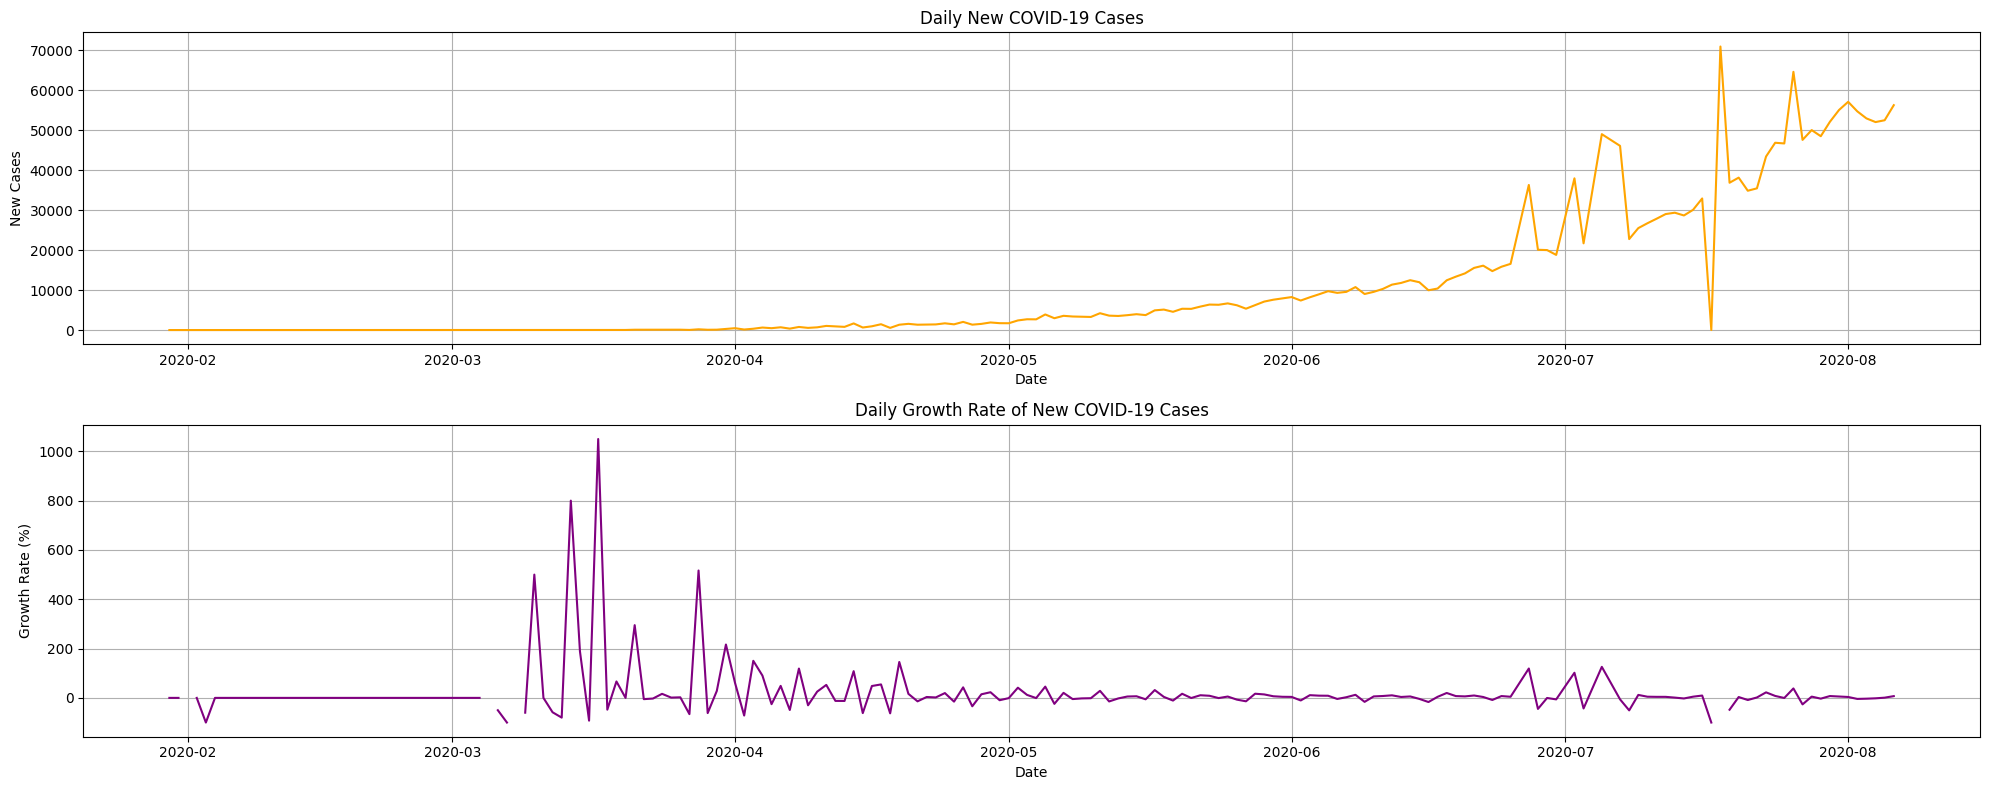

In [9]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate new cases by date
daily_new_cases = data.groupby('Date')['New cases'].sum()

# Calculate daily growth rate as a percentage
daily_growth_rate = daily_new_cases.pct_change().fillna(0) * 100

# Plot daily new cases and growth rate
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot(daily_new_cases.index, daily_new_cases, label='Daily New Cases', color='orange')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(daily_growth_rate.index, daily_growth_rate, label='Daily Growth Rate (%)', color='purple')
plt.title('Daily Growth Rate of New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Correlation Analysis and Recovery Rate Analysis

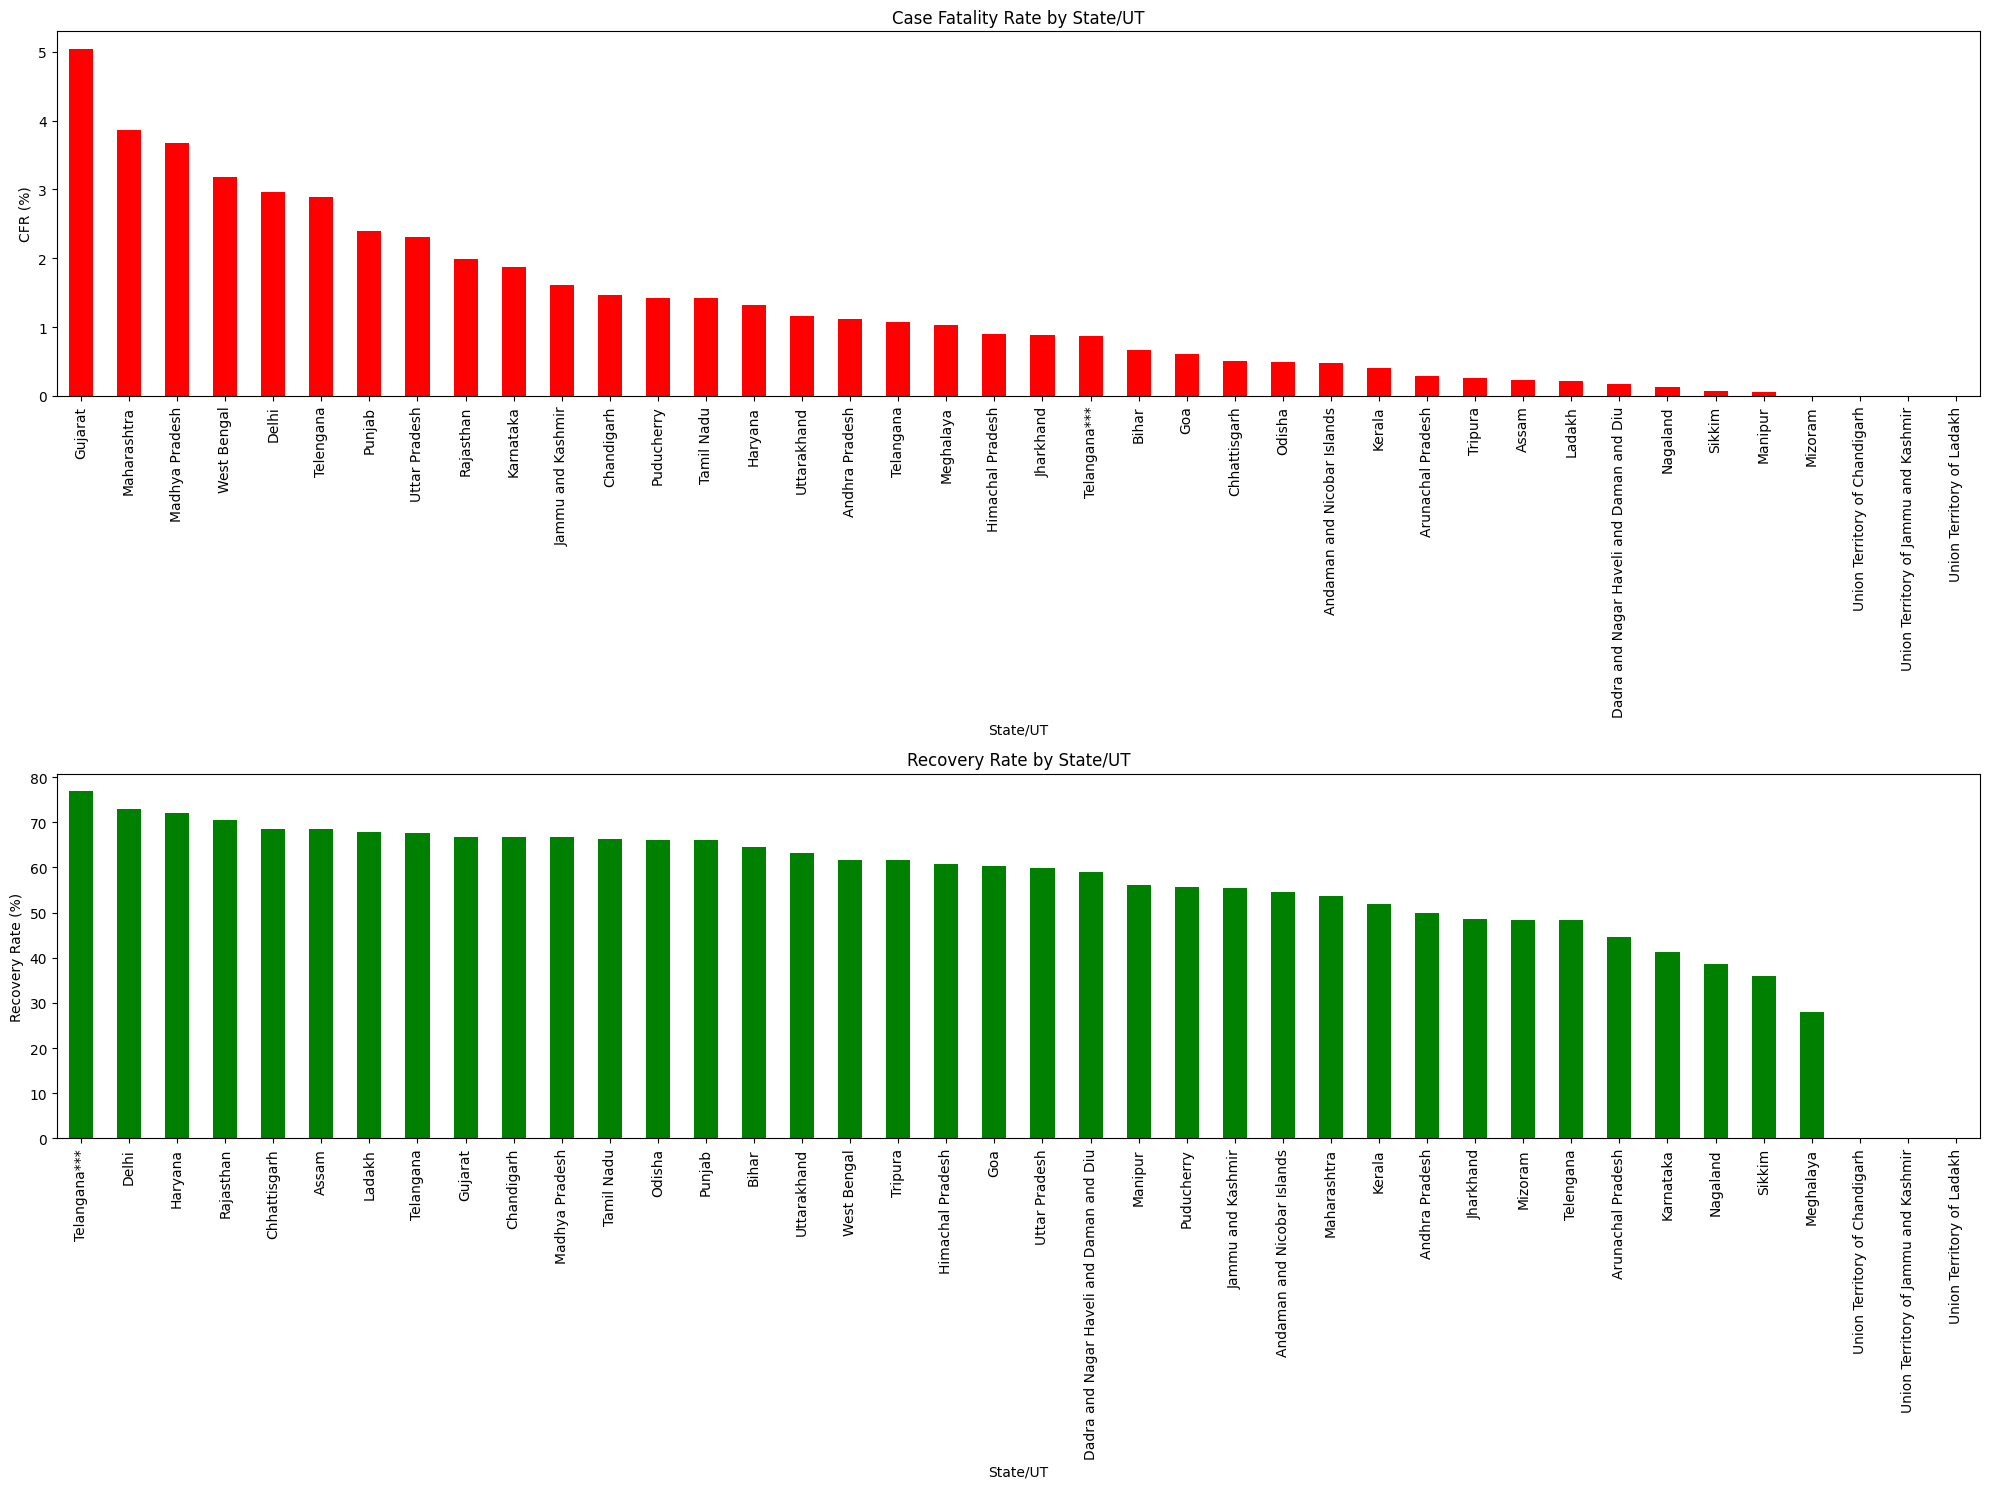

In [10]:
# Calculate CFR by state
statewise_data['CFR'] = (statewise_data['Death'] / statewise_data['Total Confirmed cases']) * 100

# Calculate recovery rate by state
statewise_data['Recovery Rate'] = (statewise_data['Cured/Discharged/Migrated'] / statewise_data['Total Confirmed cases']) * 100

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

# Plot CFR by state
statewise_data['CFR'].sort_values(ascending=False).plot(kind='bar', color='red', ax=axes[0])
axes[0].set_title('Case Fatality Rate by State/UT')
axes[0].set_xlabel('State/UT')
axes[0].set_ylabel('CFR (%)')

# Plot Recovery Rate by state
statewise_data['Recovery Rate'].sort_values(ascending=False).plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title('Recovery Rate by State/UT')
axes[1].set_xlabel('State/UT')
axes[1].set_ylabel('Recovery Rate (%)')

# Adjust layout
plt.tight_layout()
plt.show()

## Moving Averages

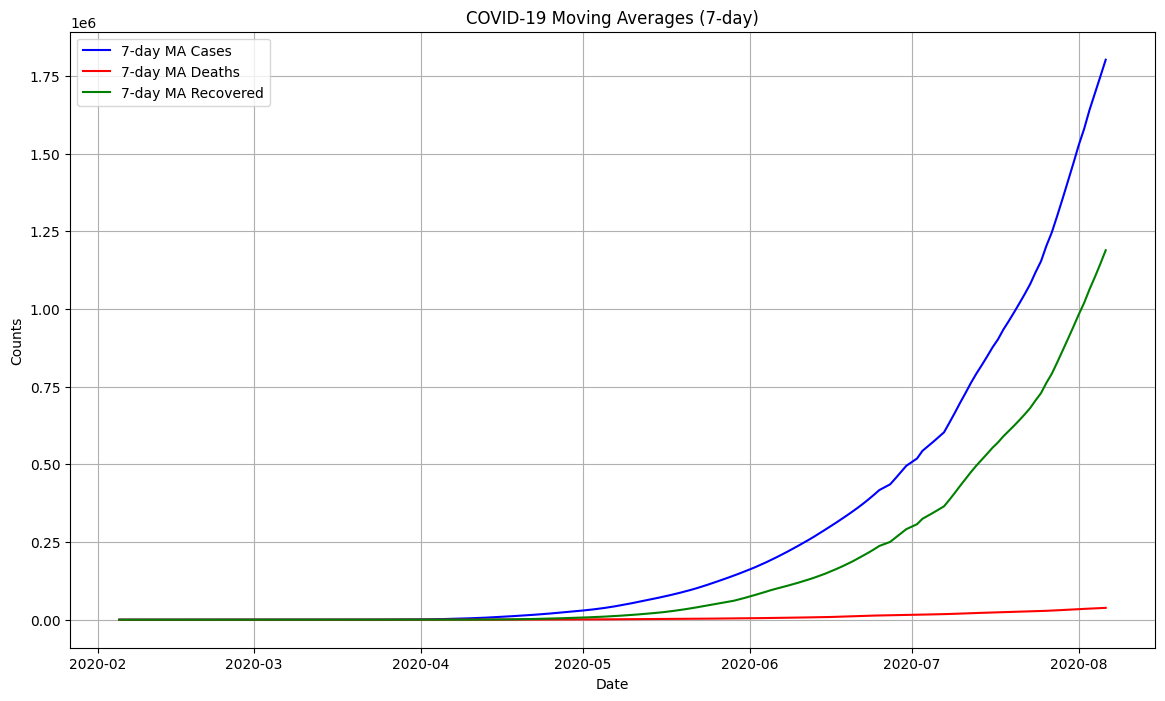

In [11]:
# Calculate moving averages for smoothing the data
daily_data['7-day MA Cases'] = daily_data['Total Confirmed cases'].rolling(window=7).mean()
daily_data['7-day MA Deaths'] = daily_data['Death'].rolling(window=7).mean()
daily_data['7-day MA Recovered'] = daily_data['Cured/Discharged/Migrated'].rolling(window=7).mean()

# Plot moving averages
plt.figure(figsize=(14, 8))

plt.plot(daily_data.index, daily_data['7-day MA Cases'], label='7-day MA Cases', color='blue')
plt.plot(daily_data.index, daily_data['7-day MA Deaths'], label='7-day MA Deaths', color='red')
plt.plot(daily_data.index, daily_data['7-day MA Recovered'], label='7-day MA Recovered', color='green')

plt.title('COVID-19 Moving Averages (7-day)')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()
